# Evaluating Linear Regression using dataset of various marketing campaigns
Part of advanced Google Data Analytics Course

**Steps**
1. Import packages & data
2. Begin EDA 
3. Clean Data
4. Build Model 
5. Check assumptions

### Import Packages & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('/Users/sethradosta/Desktop/modified_marketing_and_sales_data.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


### Begin EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


There are some missing values from each column.

Since we are trying to predict the effect an independent variable will have on the dependent variable (X) of Sales. It is important to remove missing values.

In [4]:
missing_sales = round(data.Sales.isna().mean()*100,2)
print(f'Percentage of missing sales values: {missing_sales}%')

Percentage of missing sales values: 0.13%


### Clean the data 
This data set will not need much cleaning. Just dropping the missing values for the model

In [5]:
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social_Media  4546 non-null   float64
 3   Sales         4546 non-null   float64
dtypes: float64(4)
memory usage: 177.6 KB


Now get an idea for the distribution of sales data

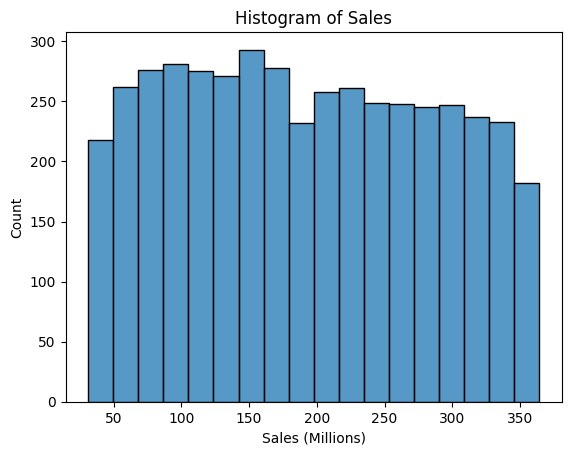

In [6]:
fig = sns.histplot(data['Sales'])
fig.set_title('Histogram of Sales')
fig.set_xlabel('Sales (Millions)');

The values of sales is relatively equally distributed between 25 - 350 million bins

### Begin to build the model

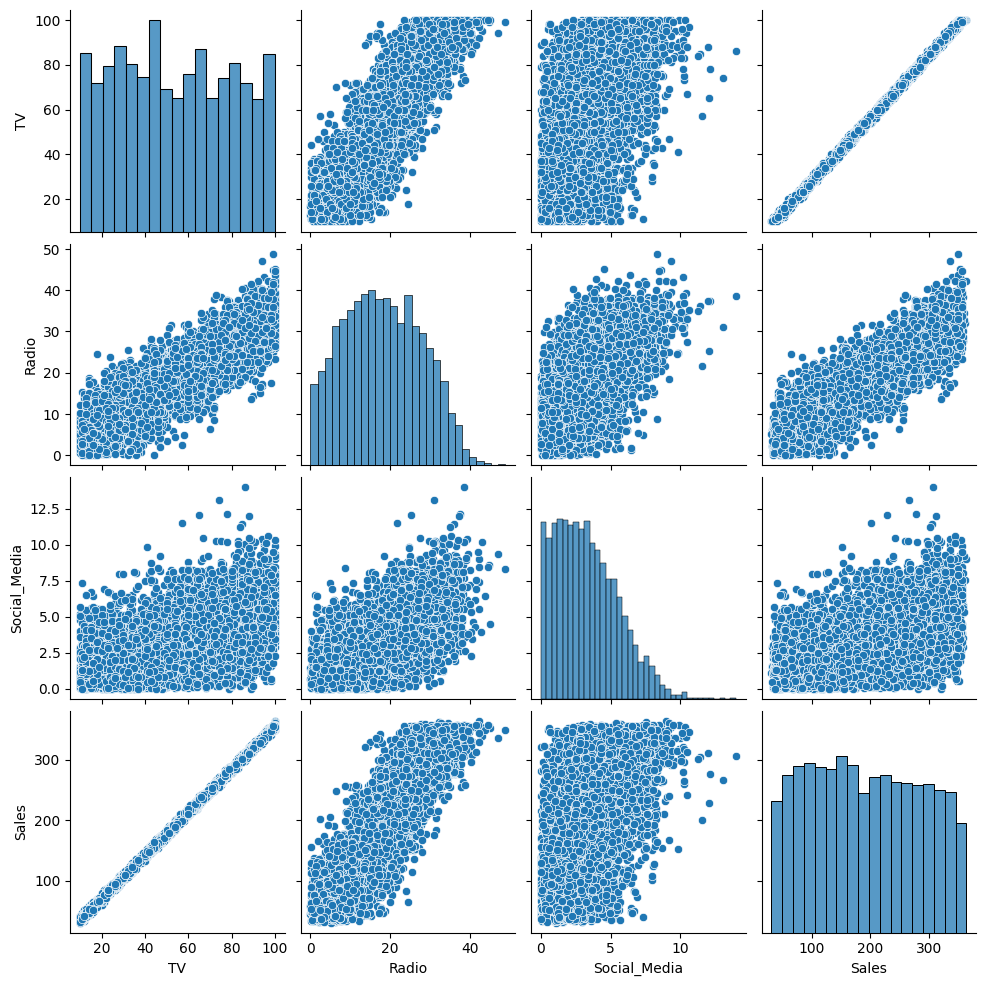

In [7]:
sns.pairplot(data)
plt.show()

TV will be selected for the X variable because it has the strongest linear relationship with sales. (by design)

In [8]:
# Variable for the OLS formula. Dependent variable(Y) first, followed by Independent(X).
ols_formula ='Sales ~ TV'
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:50:04   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1325      0.101     -1.317      0.188      -0.330       0.065
TV             3.5615      0.002   2125.272      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.031
Skew:                          -0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explore Results

R-square value is .99, meaning the independent variable in TV explains 99% of the variation in Sales

sales = -0.1325 + 3.5615 * TV

### Check Assumptions

**Model assumption: Linearity**

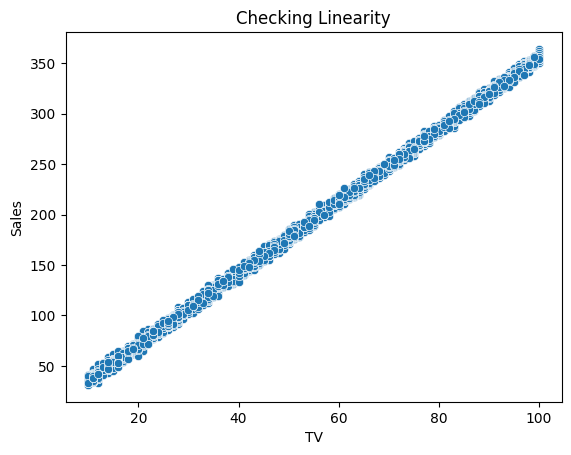

In [9]:
fig = sns.scatterplot(x = data['TV'], y = data['Sales'] )
fig.set_title('Checking Linearity');

This was checked in the pairplot above. However, it is good practice to recheck this after fitting the model.

**Model assumption: Independence**

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion is listed in its own row, they are independent from one another. Therefore, independence assumption is not violated.

**Model assumption: Normality**

Assumes that the residual values or errors are normally distributed 

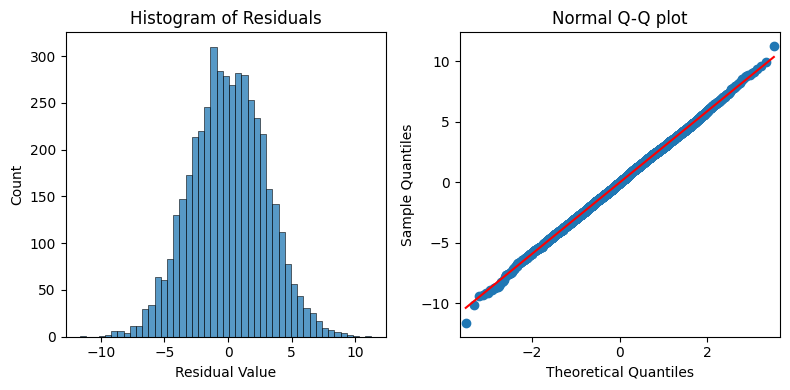

In [10]:
# Plot 1
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
fig = sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title('Histogram of Residuals')

#plot 2
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title("Normal Q-Q plot")
plt.tight_layout()
plt.show();

The histogram of the residuals are relatively normally distributed, which supports that the normality assumption is met. Also, the residuals in the Q-Q plot form a straight line. Which further supports that the normality assumption is met for this model.

**Model assumption: Homoscedasticity**

the varitation of the residuals or errors is constant or similar across the model  

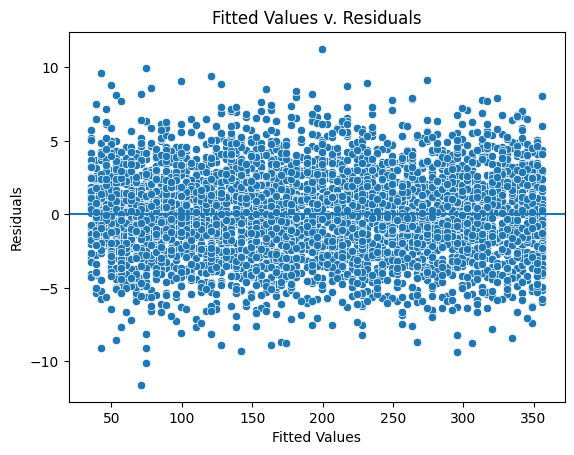

In [11]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title("Fitted Values v. Residuals") 
fig.axhline(0)
plt.show();

The Homoscedasticity assumption is met as the residuals are relatively similar across the model. 

**Question:** What recommendations would you make to the leadership at your organization?

I would recommend an increase in spending on TV promotions. A 1 million dollar increase in TV promotions is shown to increase Sales by 3.5614 million dollars based on this dataset and theoretical model. A more complicated marketing mix or model could be created by adding more indepedent variables which I will explore next. 